## Principle Component Analysis (PCA) - Low Income Population in City of Toronto

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

## Importing data

In [2]:
os.chdir('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro')
df=pd.read_csv('Data_All_sorted_alpha_MVP_V8.csv')
df.head()

,Neighbourhood,Year,Home price,Change in housing pricing,Low income population,Low income population percentage,Total Area,Total Population,Pop 25 - 34 years,Recent Immigrants,TTC Stops,Health Providers,Businesses,Social Housing Units,Rent Bank Applicants,Future_low_income_pop_per,Future_Change_housing_pricing
0,Agincourt-North,Six,234855.0,0.383812,5900,19.56,7.3,30160,3920,4265,90,17,295,77,2,18.54,0.285052
1,Agincourt-South-Malvern-West,Six,245759.0,0.364585,4330,20.08,7.9,21565,2850,3060,121,79,1399,170,12,17.76,0.307456
2,Alderwood,Six,252745.0,0.433282,2685,23.04,5.0,11655,1370,290,56,12,312,85,4,9.37,0.338412
3,Annex,Six,592630.0,0.457992,4480,16.30,2.8,27480,6760,1260,86,192,2322,1065,11,19.07,0.372706
4,Banbury-Don-Mills,Six,410468.0,0.475760,6995,27.50,10.0,25435,2790,2400,125,65,735,304,21,12.63,0.369330


## Standardize the Data

In [3]:
df.index = df.Neighbourhood
features = ['Home price','Change in housing pricing','Low income population',\
                           'Low income population percentage','Total Area','Total Population',\
                           'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
                           'Social Housing Units','Rent Bank Applicants']
x = df.loc[:, features].values
y = df.loc[:,['Future_low_income_pop_per']].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,Home price,Change in housing pricing,Low income population,Low income population percentage,Total Area,Total Population,Pop 25 - 34 years,Recent Immigrants,TTC Stops,Health Providers,Businesses,Social Housing Units,Rent Bank Applicants
0,-0.915485,0.030415,1.143522,0.083648,0.590805,1.354236,0.547734,1.672921,0.435214,-0.538331,-0.389405,-0.817120,-0.865982
1,-0.845050,-0.211197,0.378084,0.174696,0.720826,0.363464,-0.011531,0.876703,1.088226,1.217991,1.344868,-0.685879,-0.114385
2,-0.799924,0.652079,-0.423920,0.692969,0.092391,-0.778893,-0.785094,-0.953607,-0.280994,-0.679970,-0.362700,-0.805830,-0.715663
3,1.395576,0.962590,0.451215,-0.487152,-0.384353,1.045304,2.032138,-0.312668,0.350954,4.419028,2.794809,0.577144,-0.189545
4,0.218893,1.185874,1.677379,1.473879,1.175900,0.809571,-0.042892,0.440600,1.172486,0.821402,0.301791,-0.496778,0.562052


## PCA Projection to 2D

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,1.481226,-0.973763
1,1.770223,0.460215
2,-1.636822,-0.561959
3,2.965517,4.357644
4,2.200815,-0.152761


In [5]:
df[['Future_low_income_pop_per']].head()

,Future_low_income_pop_per
Neighbourhood,
Agincourt-North,18.54
Agincourt-South-Malvern-West,17.76
Alderwood,9.37
Annex,19.07
Banbury-Don-Mills,12.63


In [6]:
#finalDf = pd.concat([principalDf, df[['Future_change_low_income_pop']]],axis=1)
#finalDf.head(5)

In [7]:
pca.explained_variance_ratio_

array([0.38528511, 0.15633922])

### Making sure that 95% of the variance is retained:

In [8]:
pca = PCA(.90)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head(5)

,0,1,2,3,4,5,6,7
0,1.481226,-0.973763,0.587622,-0.070171,-0.822787,1.443034,1.485705,-0.933840
1,1.770223,0.460215,0.759040,0.871337,-0.862487,-0.174498,-0.462943,-1.218393
2,-1.636822,-0.561959,0.227099,1.284900,-0.379100,-0.440499,0.620911,-0.278171
3,2.965517,4.357644,-1.915297,0.131118,-0.677517,-0.148515,-1.562038,-0.668811
4,2.200815,-0.152761,-0.016451,1.546024,-1.602249,0.027896,0.414214,1.078836


This shows for retaining 90% of the varience 6 components are required in the model. 

In [9]:
import researchpy as rp
corr_type, corr_matrix, corr_ps = rp.corr_case(df[['Future_low_income_pop_per','Home price','Change in housing pricing','Low income population',\
                           'Low income population percentage','Total Area','Total Population',\
                           'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
                           'Social Housing Units','Rent Bank Applicants']])

In [10]:
corr_matrix

,Future_low_income_pop_per,Home price,Change in housing pricing,Low income population,Low income population percentage,Total Area,Total Population,Pop 25 - 34 years,Recent Immigrants,TTC Stops,Health Providers,Businesses,Social Housing Units,Rent Bank Applicants
Future_low_income_pop_per,1,-0.2948,-0.0655,0.3929,0.5143,-0.1307,0.1791,0.2242,0.4819,-0.0259,0.1225,0.1419,0.483,0.3501
Home price,-0.2948,1,0.0725,-0.2333,-0.3082,-0.185,-0.168,0.043,-0.2959,-0.1408,0.2457,0.1314,-0.1244,-0.4282
Change in housing pricing,-0.0655,0.0725,1,-0.1404,-0.0156,-0.1395,-0.1583,0.0322,-0.0841,-0.1083,0.1433,0.1935,0.0044,-0.1148
Low income population,0.3929,-0.2333,-0.1404,1,0.5256,0.3841,0.7283,0.5601,0.6734,0.4497,0.3233,0.2968,0.3529,0.4503
Low income population percentage,0.5143,-0.3082,-0.0156,0.5256,1,-0.0613,0.0736,0.0169,0.2684,-0.0347,0.0124,-0.0219,0.1853,0.2016
Total Area,-0.1307,-0.185,-0.1395,0.3841,-0.0613,1,0.6006,0.3043,0.3187,0.8035,0.2139,0.3607,0.0173,0.3354
Total Population,0.1791,-0.168,-0.1583,0.7283,0.0736,0.6006,1,0.7828,0.7392,0.6658,0.4472,0.4165,0.3576,0.4713
Pop 25 - 34 years,0.2242,0.043,0.0322,0.5601,0.0169,0.3043,0.7828,1,0.5506,0.424,0.4961,0.609,0.5311,0.3037
Recent Immigrants,0.4819,-0.2959,-0.0841,0.6734,0.2684,0.3187,0.7392,0.5506,1,0.3741,0.3232,0.2362,0.2656,0.4778
TTC Stops,-0.0259,-0.1408,-0.1083,0.4497,-0.0347,0.8035,0.6658,0.424,0.3741,1,0.4367,0.6068,0.1326,0.3839


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


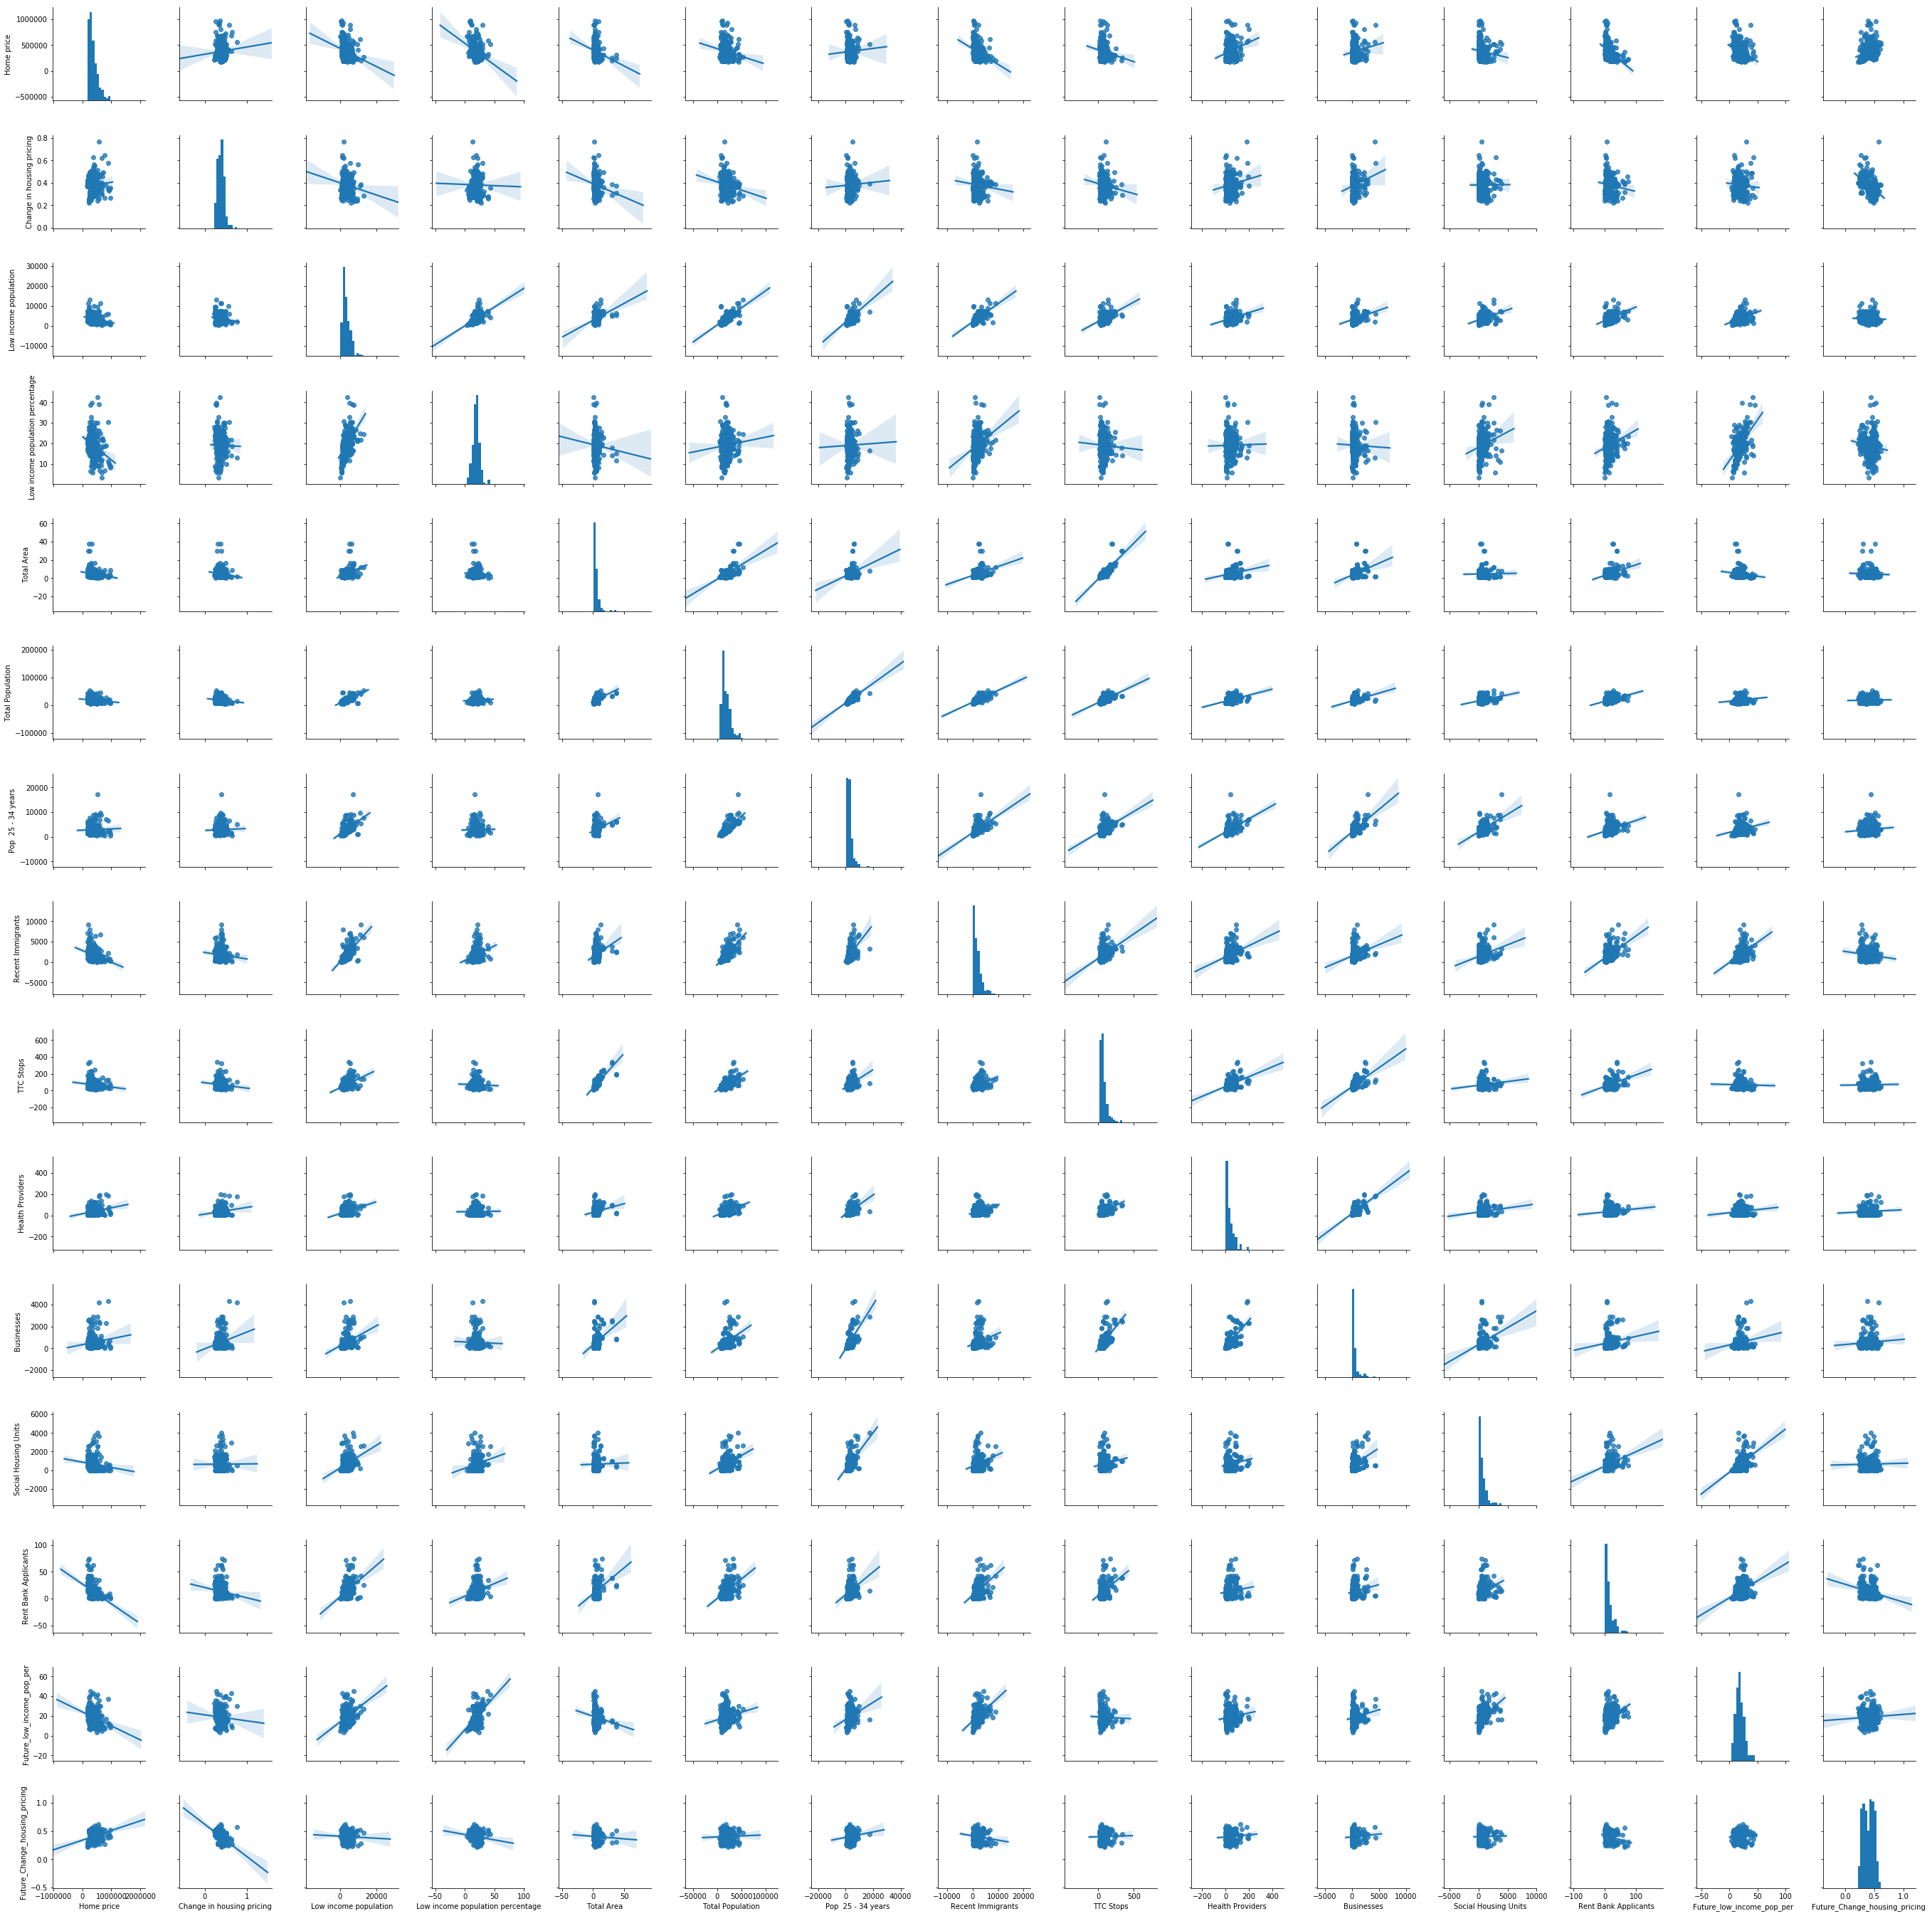

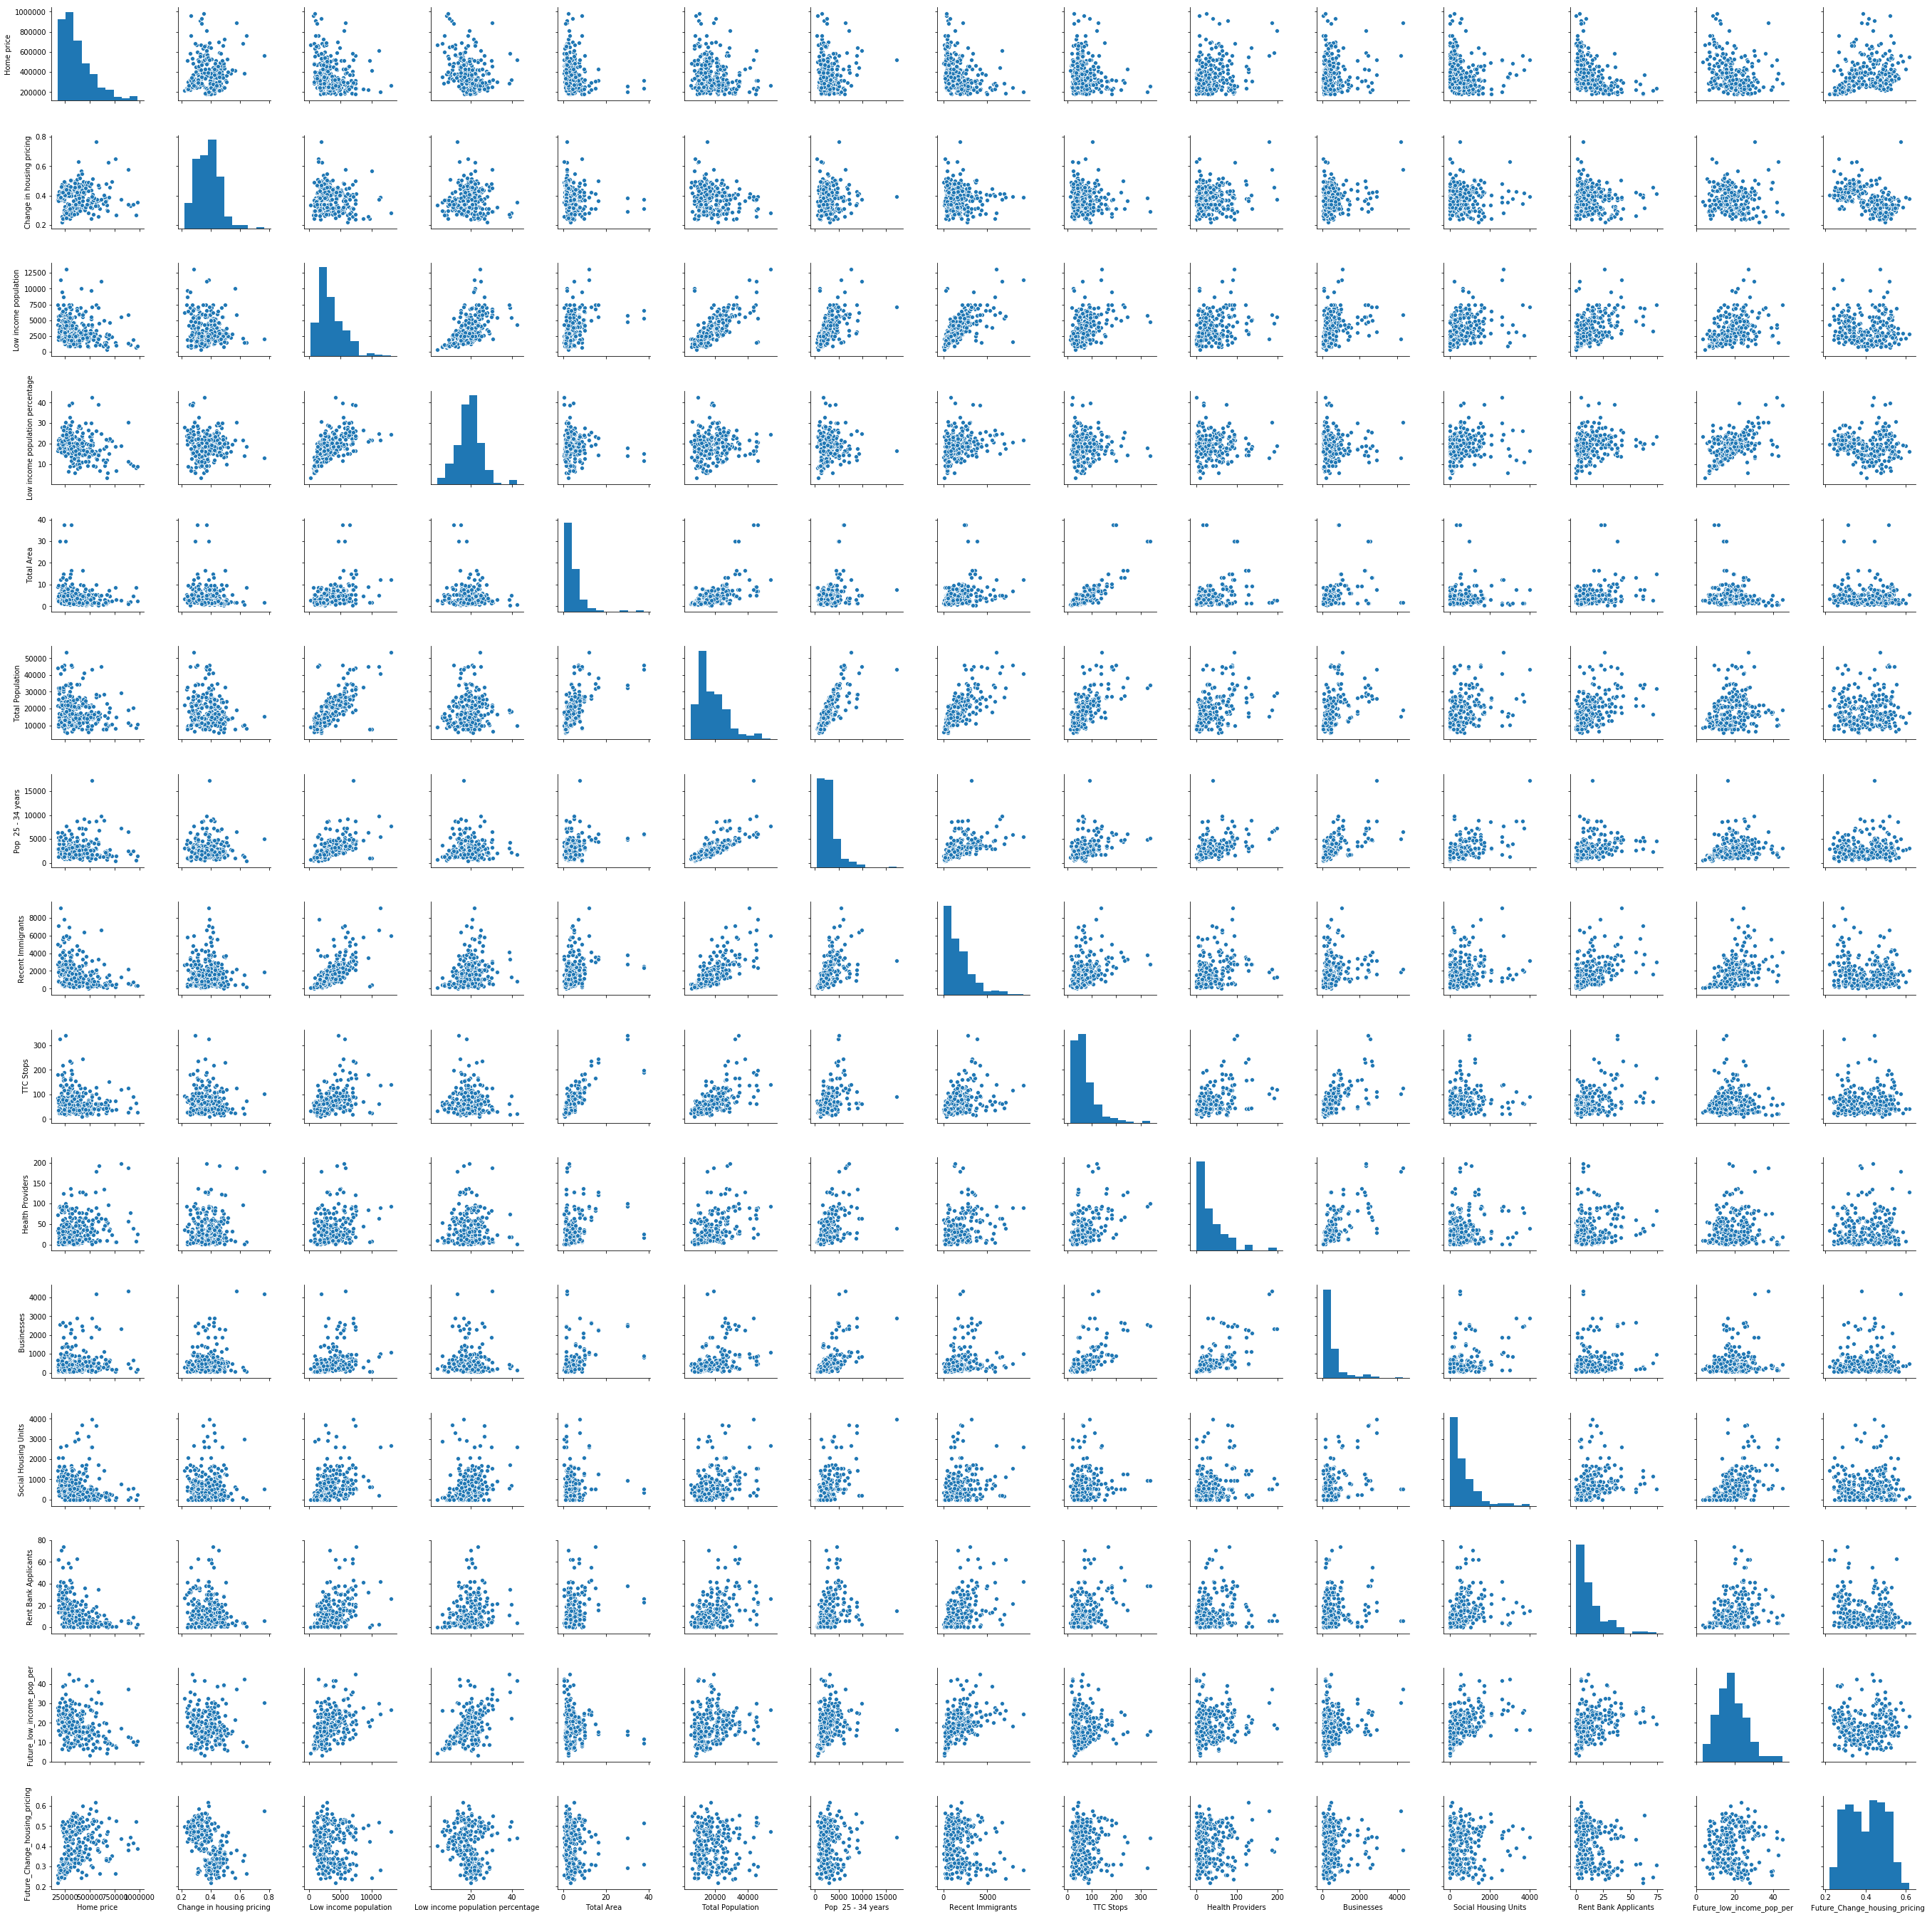

In [36]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro')
df=pd.read_csv('Data_All_sorted_alpha_MVP_V8.csv')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plt.show()
